<a href="https://colab.research.google.com/github/AnnapurnaVadlamudi/DL-exp/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import numpy as np

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_X, train_Y), (test_X, test_Y) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from keras.utils import to_categorical

def OneHotEncoding_fn(ReutersData, dimension=10000):
    # 8982 x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(ReutersData), dimension))
    for i, sequence in enumerate(ReutersData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)

y_train = to_categorical(train_Y)
y_test = to_categorical(test_Y)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:800]
X_train_without_val = x_train[800:]
y_validation = y_train[:800]
y_train_without_val = y_train[800:]


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001, rho=0.9),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))


Epoch 1/25
16/16 [==============================] - 2s 65ms/step - loss: 0.1280 - categorical_accuracy: 0.9554 - val_loss: 0.9818 - val_categorical_accuracy: 0.8112
Epoch 2/25
16/16 [==============================] - 1s 50ms/step - loss: 0.1148 - categorical_accuracy: 0.9545 - val_loss: 0.9932 - val_categorical_accuracy: 0.8138
Epoch 3/25
16/16 [==============================] - 1s 47ms/step - loss: 0.1072 - categorical_accuracy: 0.9583 - val_loss: 1.0460 - val_categorical_accuracy: 0.8062
Epoch 4/25
16/16 [==============================] - 1s 68ms/step - loss: 0.1068 - categorical_accuracy: 0.9583 - val_loss: 0.9876 - val_categorical_accuracy: 0.8138
Epoch 5/25
16/16 [==============================] - 1s 84ms/step - loss: 0.1043 - categorical_accuracy: 0.9569 - val_loss: 0.9893 - val_categorical_accuracy: 0.8163
Epoch 6/25
16/16 [==============================] - 1s 75ms/step - loss: 0.1102 - categorical_accuracy: 0.9578 - val_loss: 0.9776 - val_categorical_accuracy: 0.8125
Epoch 7/25

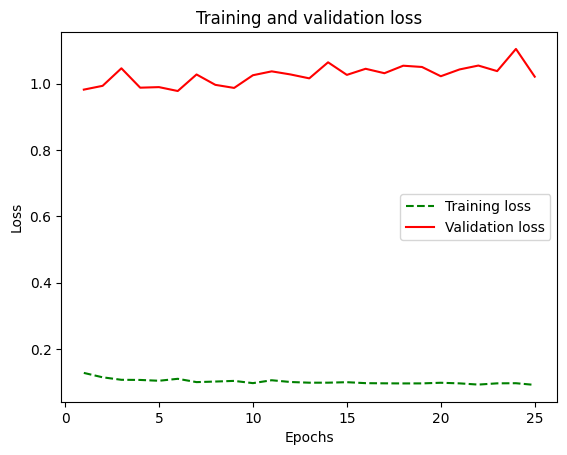

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

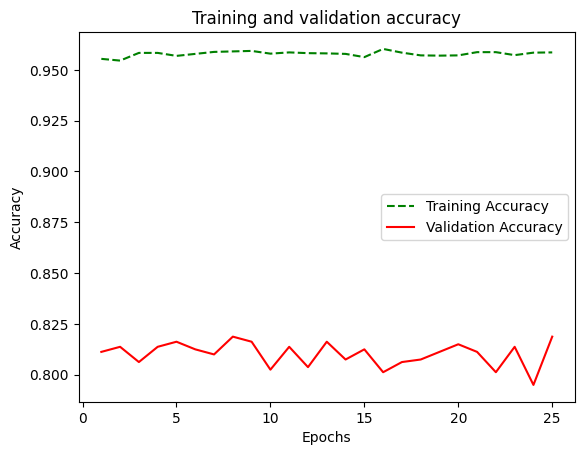

In [ ]:
plt.clf()
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
